# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data

In [3]:
df = pd.read_csv('mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


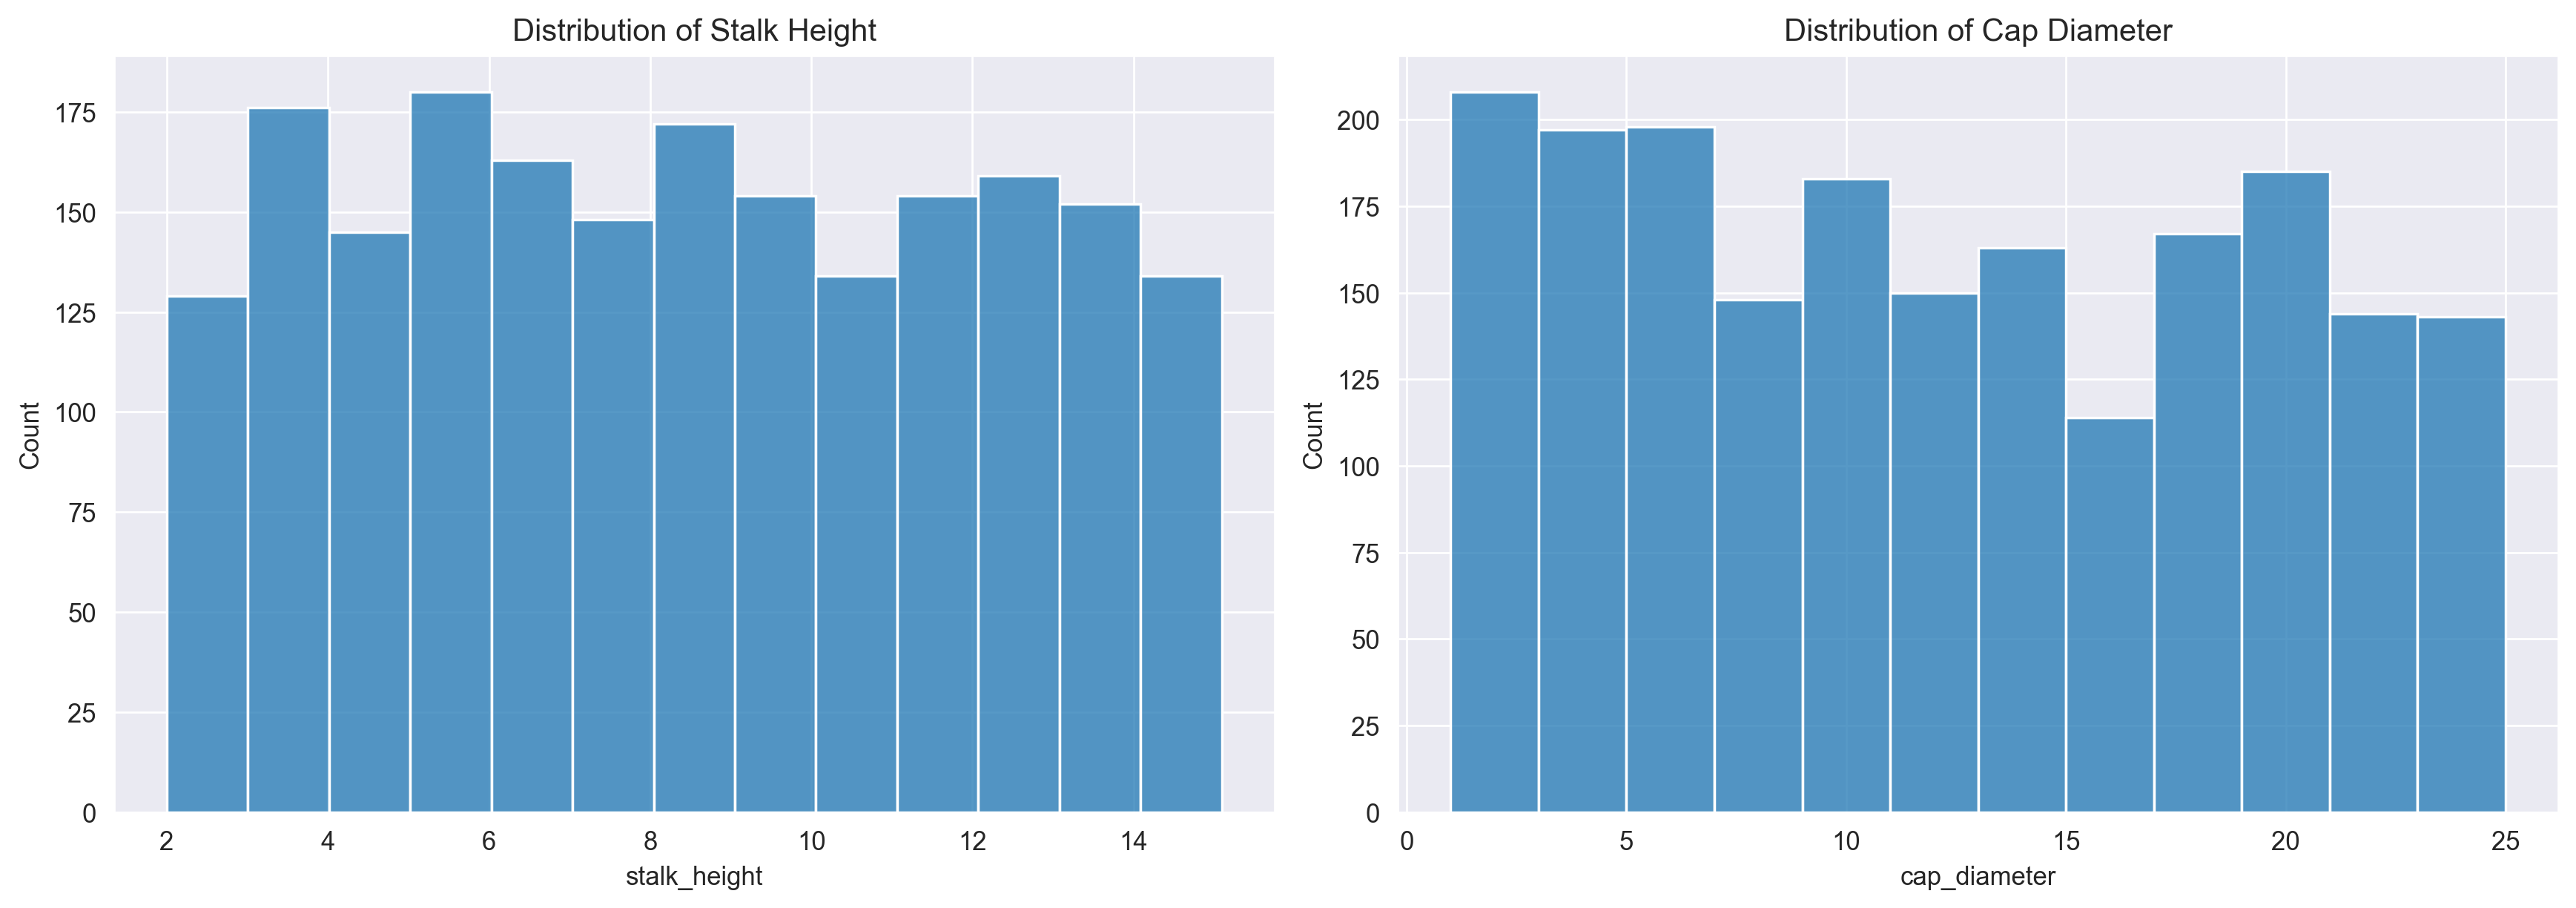

In [8]:
sns.histplot(df['stalk_height'],ax=axes[0])
axes[0].set_title('Distribution of Stalk Height')
sns.histplot(df['cap_diameter'],ax=axes[1])
axes[1].set_title('Distribution of Cap Diameter')
plt.tight_layout()
plt.show()

In [ ]:
'''
Stalk Height is right-skewed, with some higher outliers.
Cap Diameter appears more normally distributed but shows a slightly bimodal shape.
'''

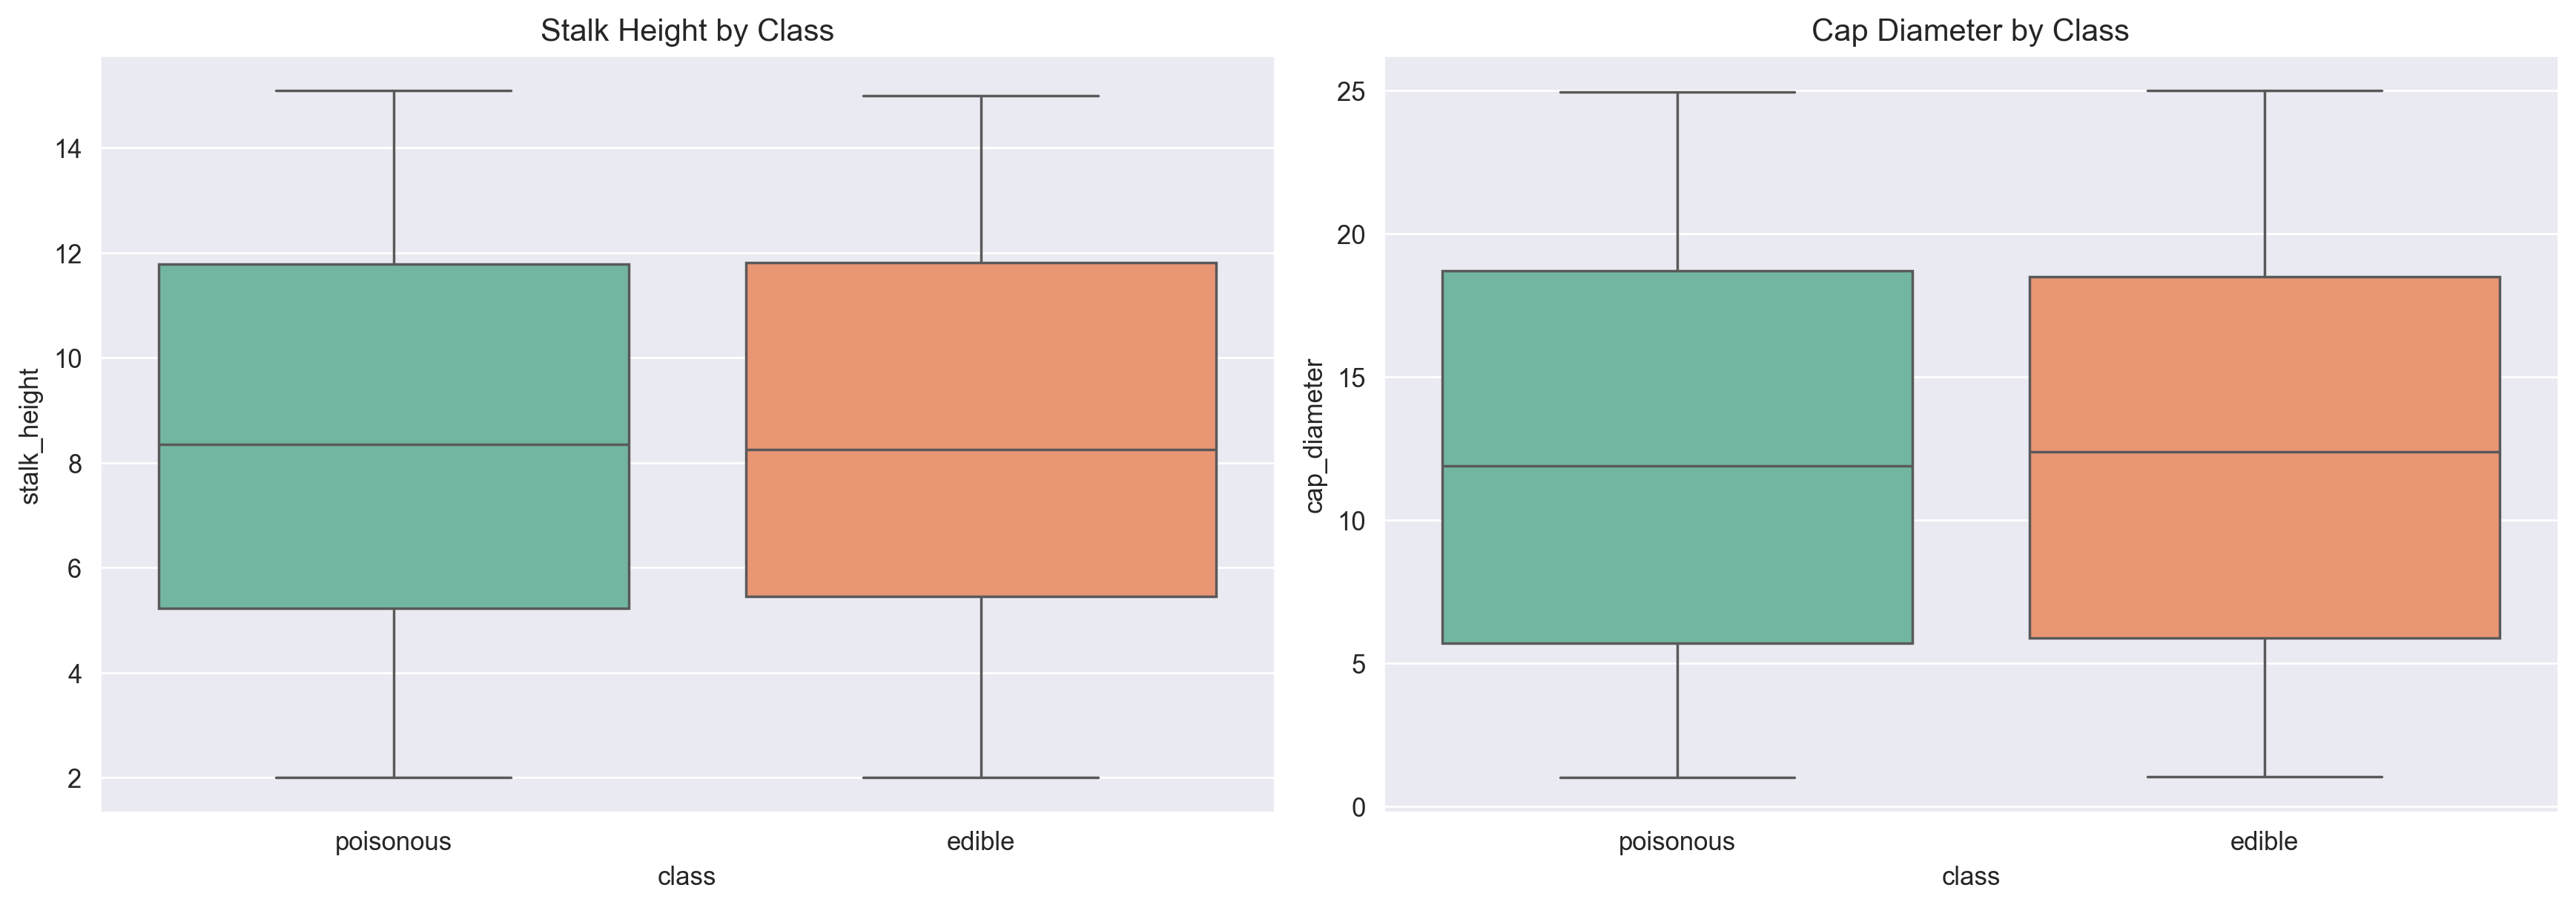

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(data=df, x='class', y='stalk_height', ax=axes[0], palette='Set2')
axes[0].set_title('Stalk Height by Class')
sns.boxplot(data=df, x='class', y='cap_diameter', ax=axes[1], palette='Set2')
axes[1].set_title('Cap Diameter by Class')
plt.tight_layout()
plt.show()

In [ ]:
'''
Stalk Height tends to be higher in poisonous mushrooms.
Cap Diameter does not clearly differentiate between edible and poisonous mushrooms, but there is some variation in spread and medians.
'''

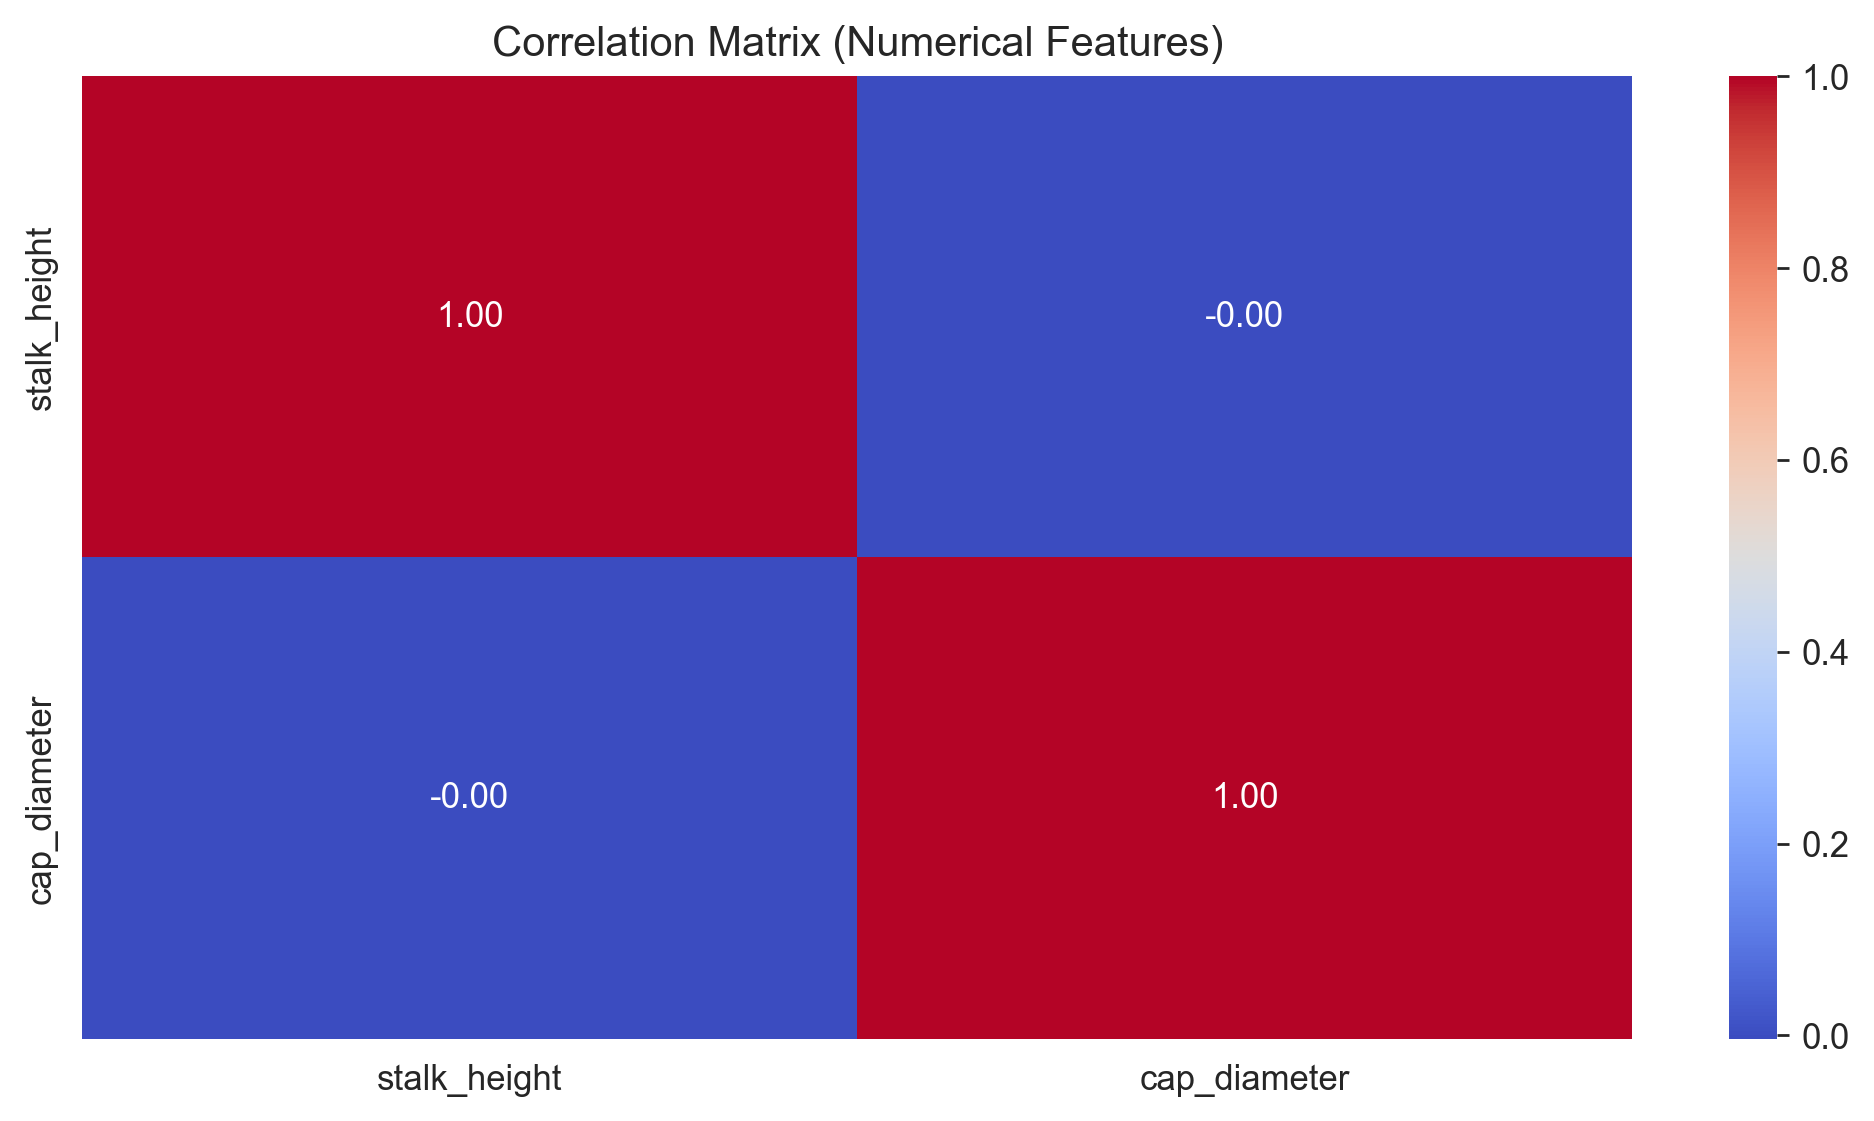

In [10]:
corr_matrix = df[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [ ]:
'''
A heatmap between stalk_height and cap_diameter with values from -0 to 1.
A positive correlation would suggest that as one increases, the other tends to as well.
A low correlation means these features vary independently.
'''

In [64]:
# Task 2: Data Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop("class", axis=1)
y = df["class"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Task 3: Data Visualization

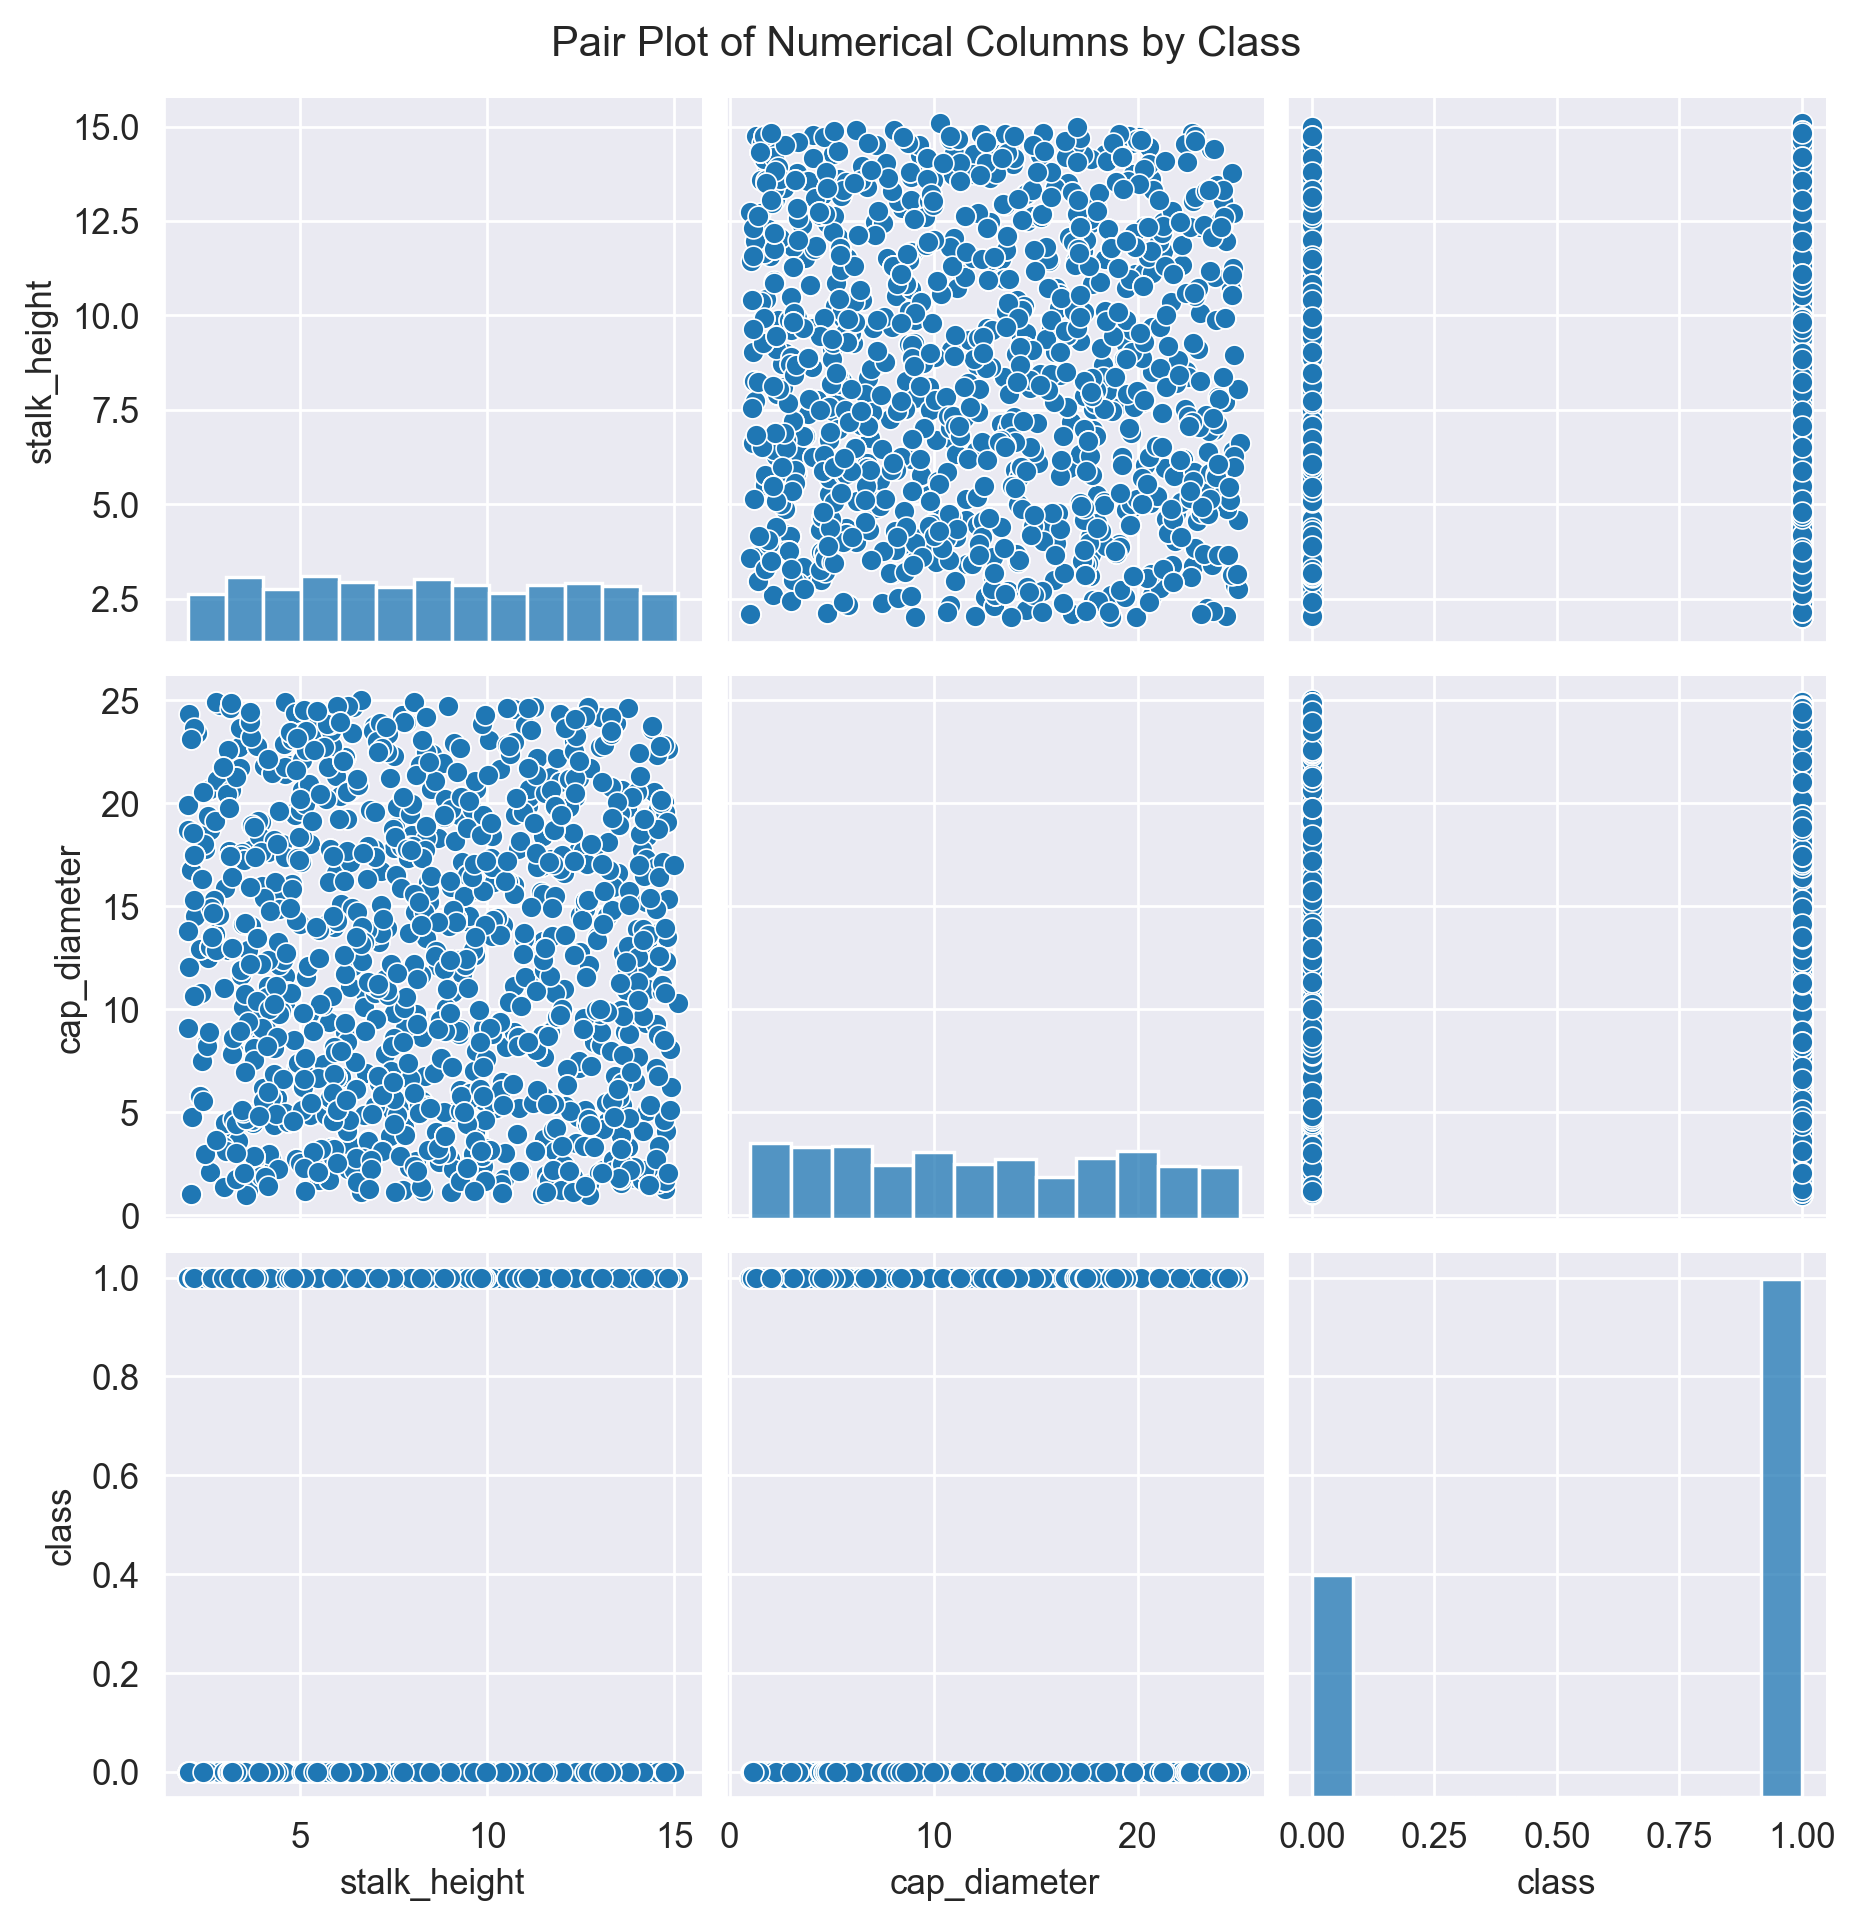

In [17]:
sns.pairplot(df[['stalk_height', 'cap_diameter', 'class']])
plt.suptitle("Pair Plot of Numerical Columns by Class", y=1.02)
plt.show()

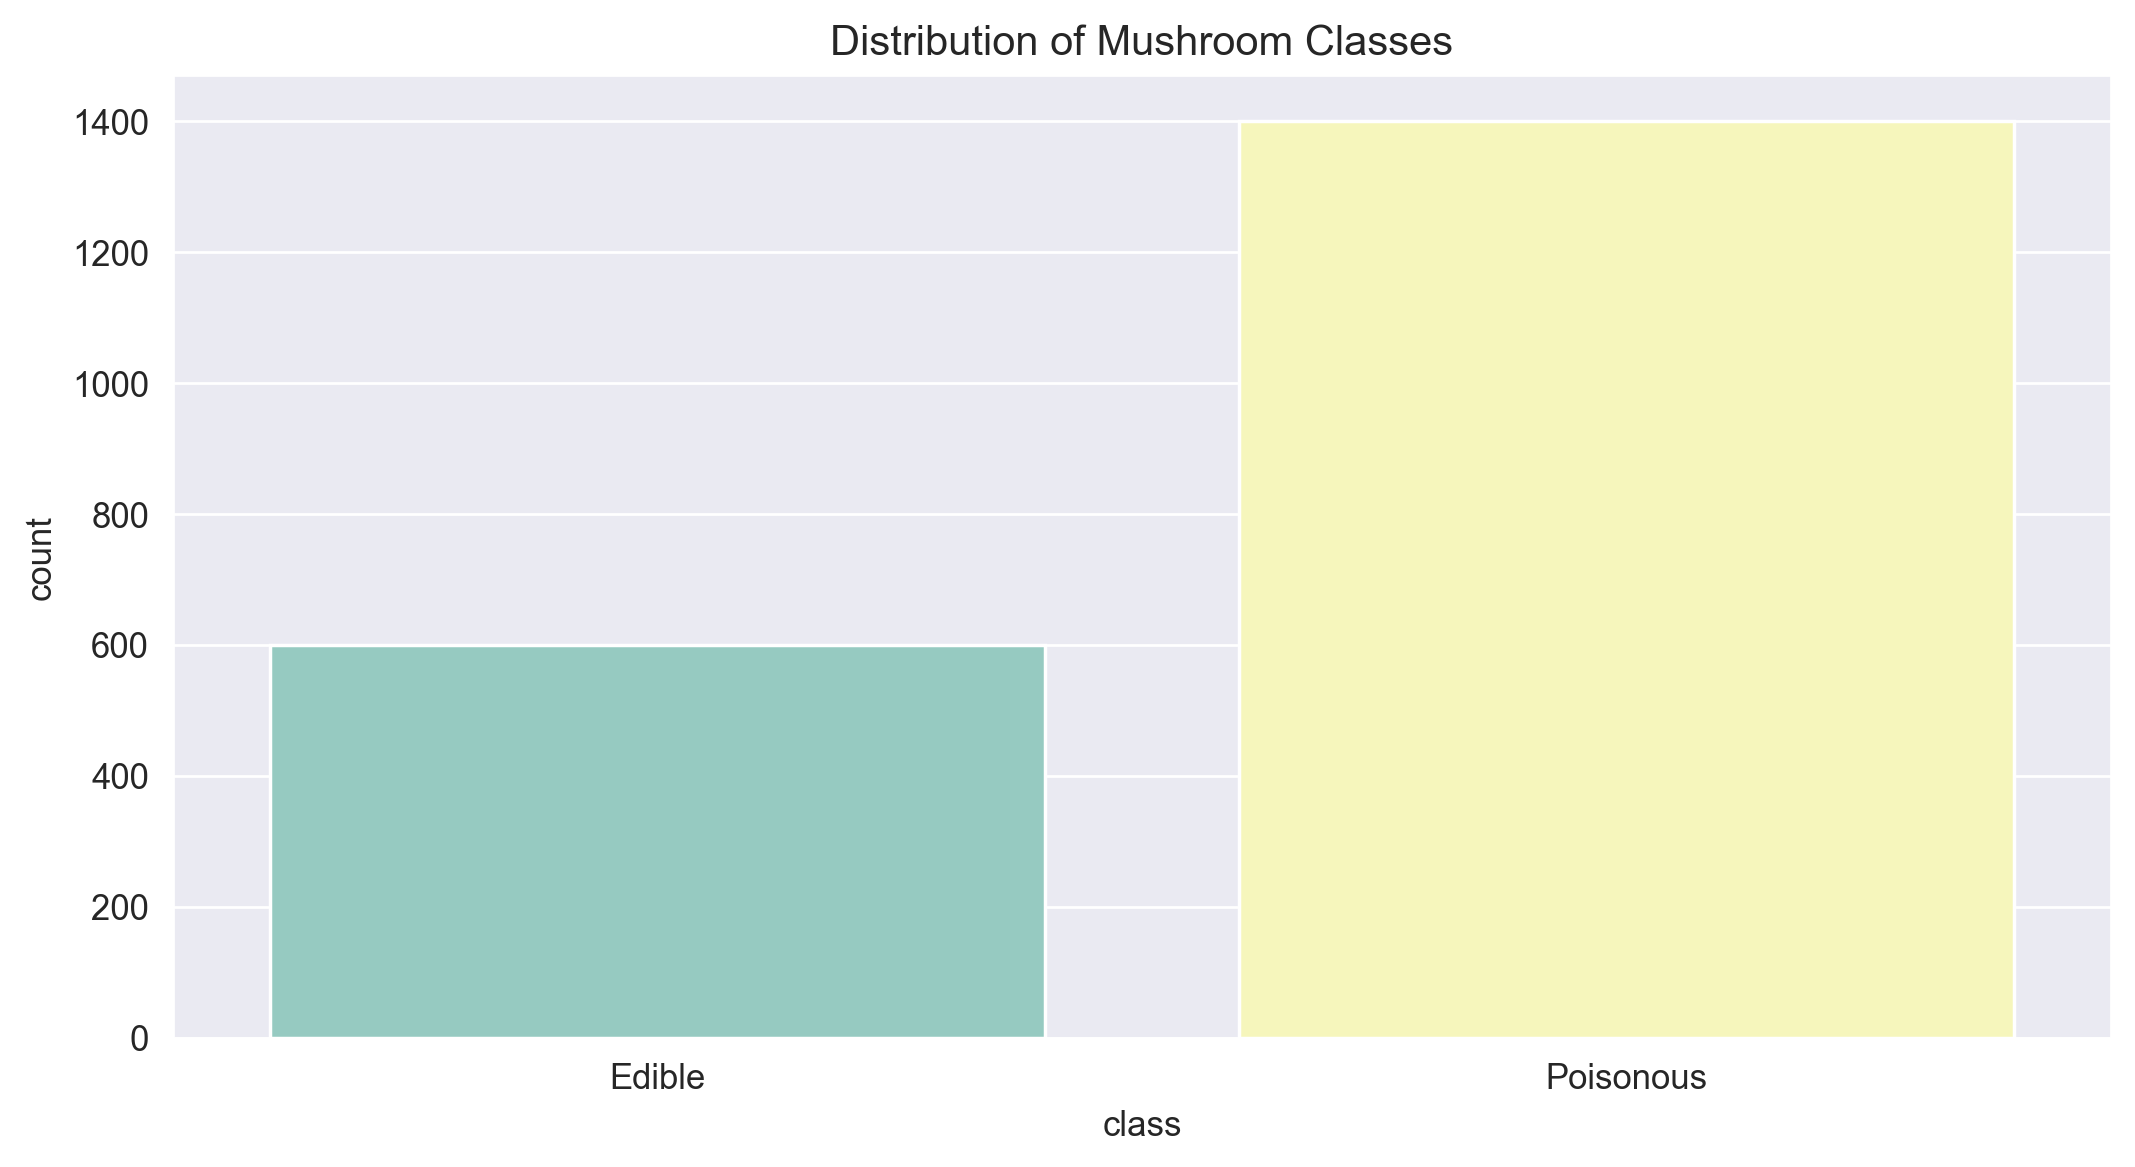

In [18]:
sns.countplot(x='class', data=df, palette='Set3')
plt.title('Distribution of Mushroom Classes')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'])
plt.show()

In [72]:
# Task 4: SVM Implementation

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [21]:
y_pred = svm_model.predict(X_test)

In [22]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))

Accuracy Score: 0.6675

Classification Report:
              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00       133
   Poisonous       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



In [23]:
cm = confusion_matrix(y_test, y_pred)

In [78]:
# Task 5: Visualization of SVM Results

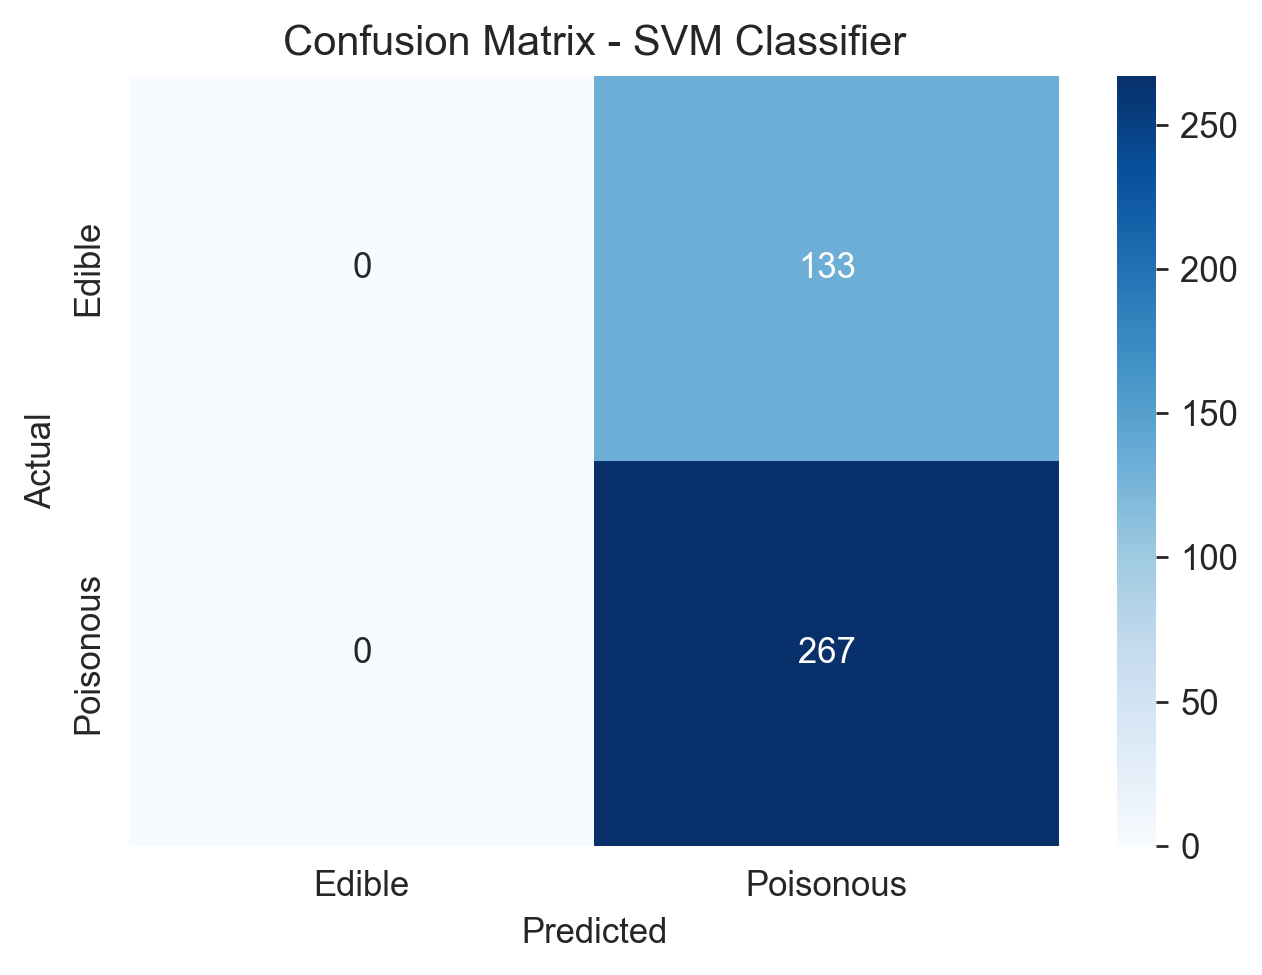

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

In [80]:
# Task 6: Parameter Tuning and Optimization

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3]  
}

In [27]:
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [28]:
print("Best Parameters from GridSearchCV:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters from GridSearchCV: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8506250000000002


In [29]:
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\nTest Set Evaluation of Best SVM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=['Edible', 'Poisonous']))


Test Set Evaluation of Best SVM Model:
Accuracy: 0.885

Classification Report:
              precision    recall  f1-score   support

      Edible       0.98      0.67      0.79       133
   Poisonous       0.86      0.99      0.92       267

    accuracy                           0.89       400
   macro avg       0.92      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



In [86]:
# Task 7: Kernel Comparison

In [ ]:
'''
1. Comparison of SVM Performance with Various Kernels.
Evaluated the performance of SVM using different kernel types: linear, polynomial, and RBF (radial basis function).

The RBF kernel performed the best overall, especially in identifying poisonous mushrooms, which is crucial for safety-critical applications.
The linear and polynomial kernels showed lower accuracy in prior comparisons.
The model had high precision for edible mushrooms, but lower recall, meaning it missed some edible mushrooms by labeling them as poisonous.

2. SVM Strengths & Weaknesses for the Mushroom Dataset
Strengths:
Effective with categorical columns after encoding.
High dimensionality of columns doesn't degrade performance.
Robust decision boundaries, especially with the RBF kernel.
Balanced class distribution supports stable training.

Weaknesses:
Moderate recall for edible class 0.67: The model is conservative and tends to overpredict "poisonous" to avoid false negatives.
Interpretability: SVM does not provide clear insights into which features drive predictions.
Parameter tuning: Performance depends on careful selection of C, gamma, and kernel.

3. SVMs are widely used in fields like:
Medical diagnosis: Classifying tumors as benign or malignant.
Email filtering: Distinguishing spam from legitimate emails.
Bioinformatics: Gene classification, protein function prediction.

Use SVM when: Need of high accuracy, have structured data, and can afford some tuning time.
Avoid SVM when: We need model explainability or work with very large datasets requiring fast training/predictions.

Summary:
Best kernel: RBF
Accuracy: 88.5%
Strengths: High performance on structured data, especially with safety-critical class
'''